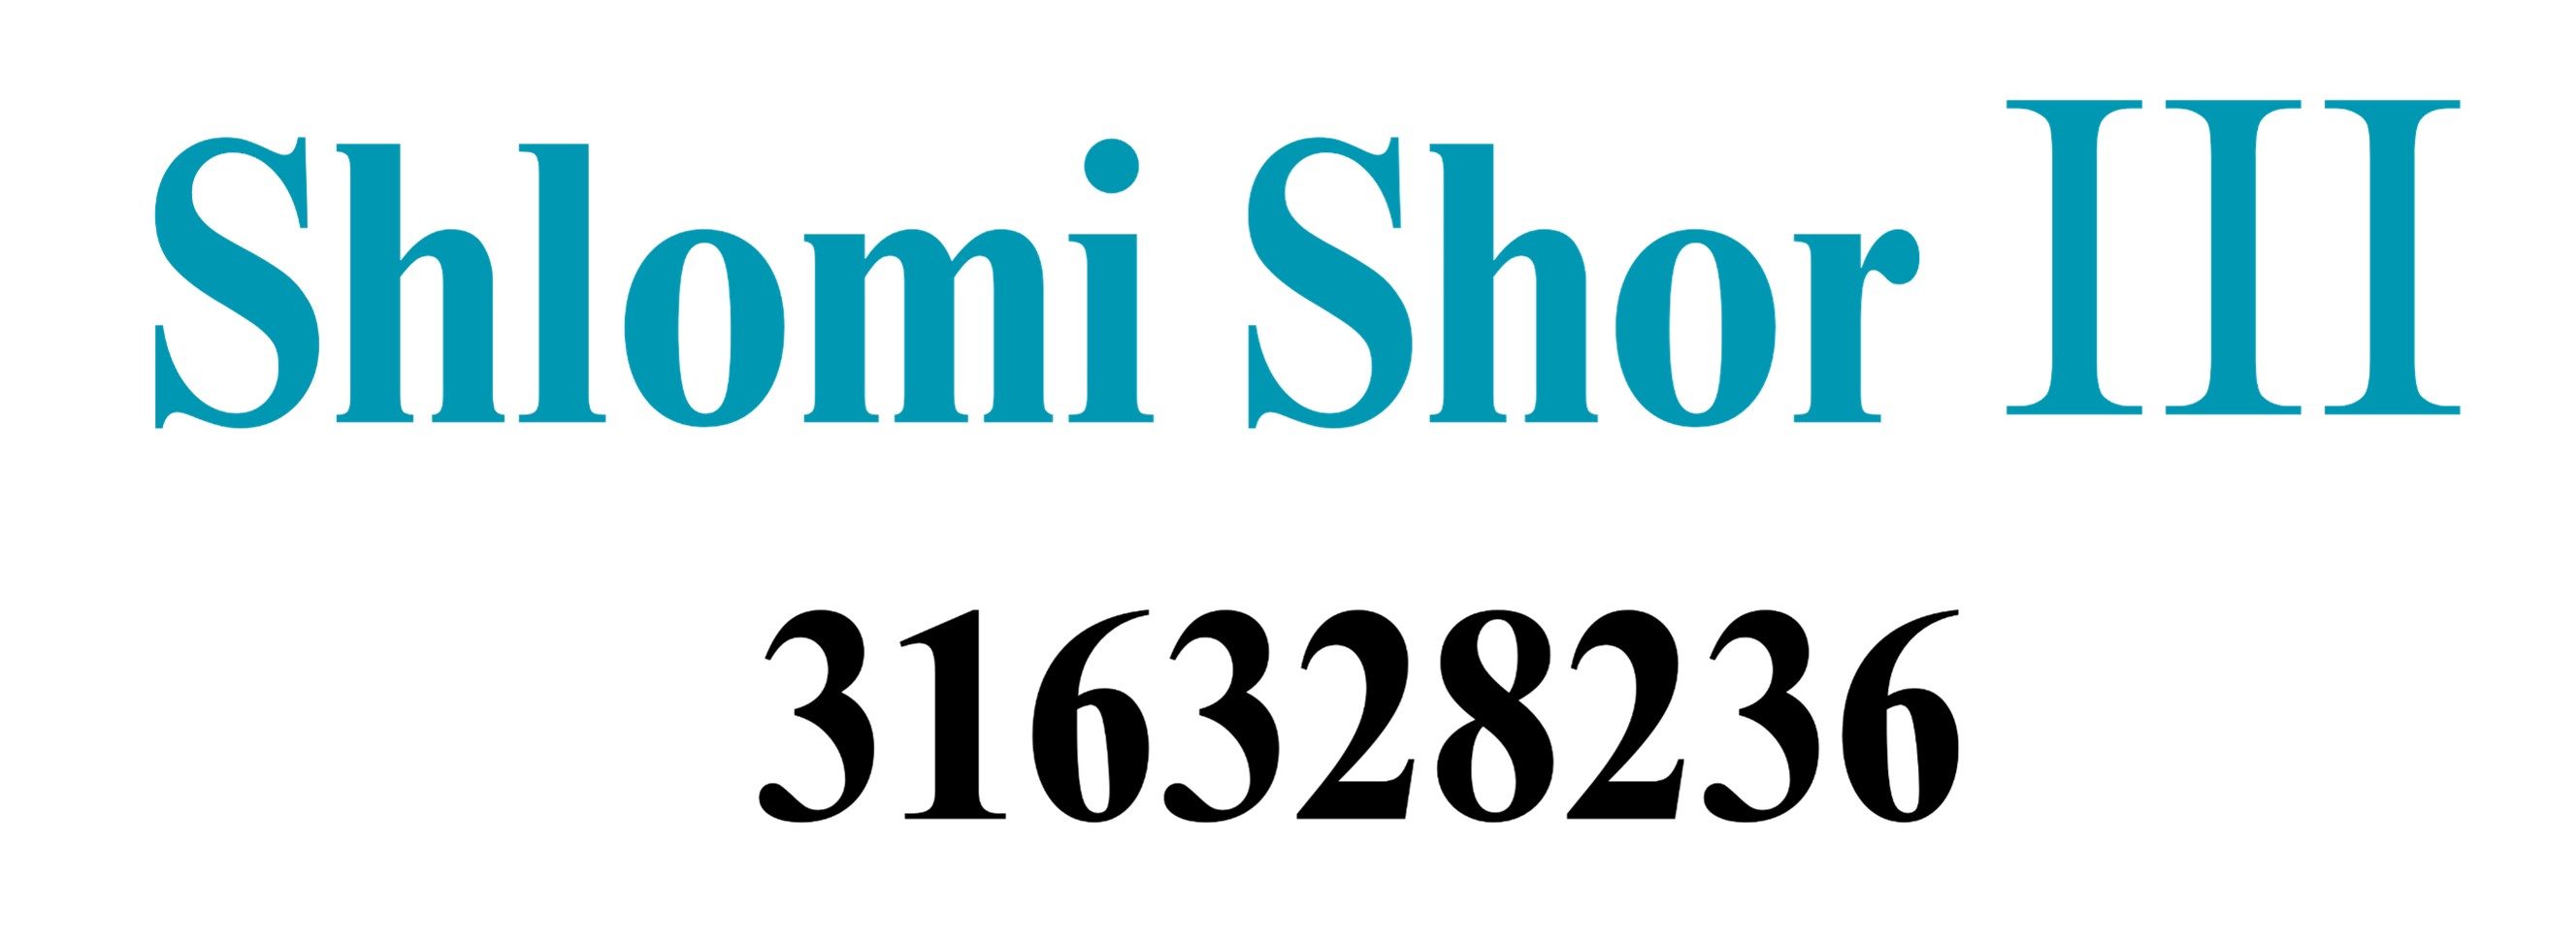

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import gdown
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import community

In [ ]:
%%capture
!pip install networkx matplotlib
!pip install networkx pandas matplotlib seaborn
!pip install python-louvain
!pip show community

# **Part Two:**

# **Q1**

In [ ]:
# First Way Load Batman Rerturns network data to Python:

url = 'https://drive.google.com/uc?export=download&id=1iOe6-a8e0tIAspz9QrffMYlur1gNnqe9'
output = '/content/Batman_Returns.gexf'

# Download the file
gdown.download(url, output, quiet=False)

# Load the GEXF file into a graph
G = nx.read_gexf(output)

Downloading...
From: https://drive.google.com/uc?export=download&id=1iOe6-a8e0tIAspz9QrffMYlur1gNnqe9
To: /content/Batman_Returns.gexf
100%|██████████| 66.8k/66.8k [00:00<00:00, 18.1MB/s]


In [ ]:
# Second Way Load Batman Rerturns network data to Python:

path = "https://drive.google.com/file/d/1iOe6-a8e0tIAspz9QrffMYlur1gNnqe9/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id=' + path.split('/')[-2]
file_name = 'Batman_Returns.gexf'
!wget -O 'Batman_Returns.gexf' 'https://drive.google.com/uc?export=download&id=1iOe6-a8e0tIAspz9QrffMYlur1gNnqe9' #Downloading the file from google drive to colab
G = nx.read_gexf(file_name)

--2024-05-13 17:34:18--  https://drive.google.com/uc?export=download&id=1iOe6-a8e0tIAspz9QrffMYlur1gNnqe9
Resolving drive.google.com (drive.google.com)... 142.250.99.113, 142.250.99.100, 142.250.99.139, ...
Connecting to drive.google.com (drive.google.com)|142.250.99.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1iOe6-a8e0tIAspz9QrffMYlur1gNnqe9&export=download [following]
--2024-05-13 17:34:18--  https://drive.usercontent.google.com/download?id=1iOe6-a8e0tIAspz9QrffMYlur1gNnqe9&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.202.132, 2607:f8b0:400e:c00::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.202.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66795 (65K) [application/octet-stream]
Saving to: ‘Batman_Returns.gexf’

Batman_Returns.gexf 100%[===================>]  65.23K  --.-

In [ ]:
print("Number OF Nodes:", G.number_of_nodes())
print("Number Of Edges:", G.number_of_edges())

Number OF Nodes: 51
Number Of Edges: 124


# **Q2**

**Circular layout**

Nodes with highest degree centrality: ['639822', '639688', '640552', '640209', '642285']


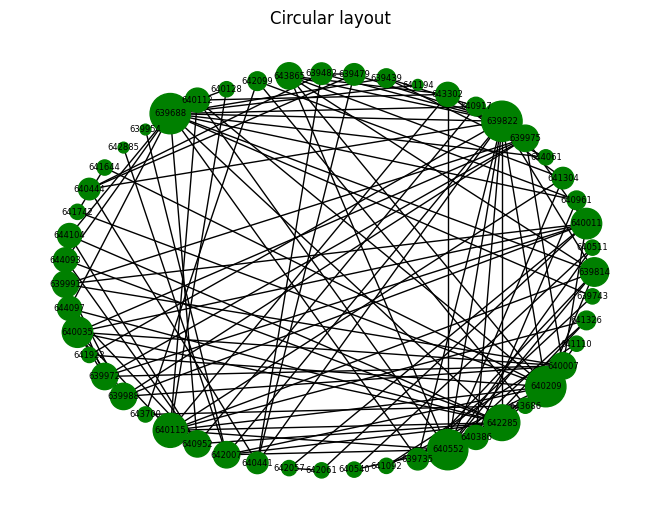

In [ ]:
# Calculate degree centrality for each node
degree_centrality = nx.degree_centrality(G)
# Scale node sizes based on degree centrality
node_sizes = [3000 * degree_centrality[node] for node in G.nodes()]
# Define the layout algorithm and test parameters
pos = nx.circular_layout(G)
# Draw the graph with adjusted parameters
nx.draw(G, pos, with_labels=True, node_color='green', node_size=node_sizes, font_size=6)
plt.title('Circular layout')

degree_centrality = nx.degree_centrality(G)
top_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:5]


print("Nodes with highest degree centrality:", top_nodes)
plt.show()

**Spring layout**

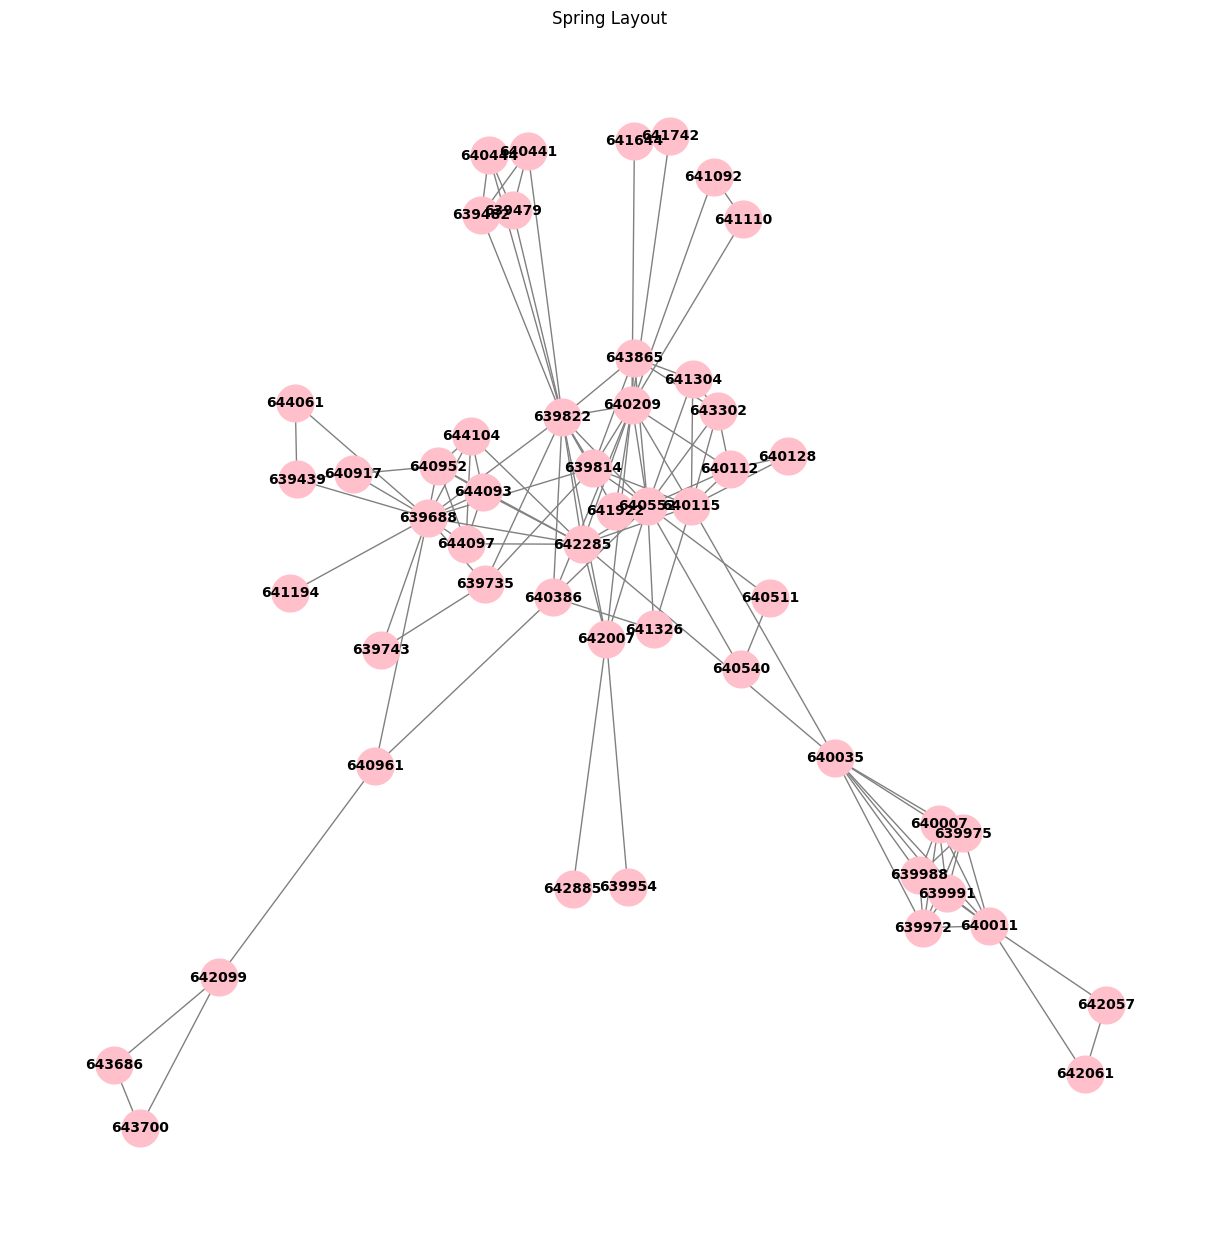

In [ ]:
G = nx.read_gexf('/content/Batman_Returns.gexf')

# Spring layout visualization
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)  # The seed ensures consistency in layout
nx.draw(G, pos, with_labels=True, node_size=700, node_color='pink', font_size=10, font_weight='bold', edge_color='gray')
plt.title("Spring Layout")
plt.show()


**Kamada Kawai Layout**

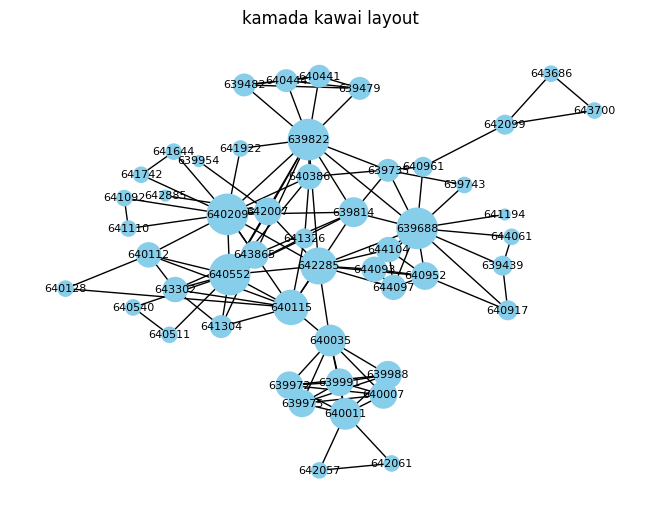

In [ ]:
# Define the layout algorithm and test parameters
pos = nx.kamada_kawai_layout(G)

# Draw the graph with adjusted parameters
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=node_sizes, font_size=8)

plt.title('kamada kawai layout')

# Display the plot
plt.show()

# **Q3**

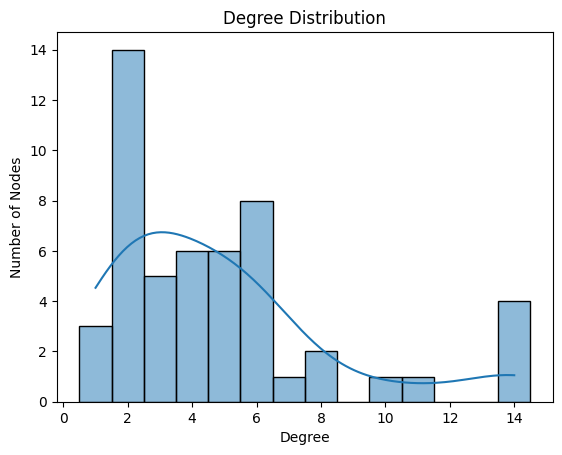

Network Density: 0.09725490196078432


In [ ]:
# Get the degrees of all nodes
degrees = dict(nx.degree(G))

# Plot the degree distribution
sns.histplot(list(degrees.values()), discrete=True, kde=True)
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.title('Degree Distribution')
plt.show()

# Calculate network density
density = nx.density(G)
print("Network Density:", density)

# **Q4**

In [ ]:
# Calculate closeness centrality, degree, and clustering coefficient for each node
closeness_centrality = nx.closeness_centrality(G)
degree_centrality = nx.degree_centrality(G)
clustering_coefficient_centrality = nx.clustering(G)

# Find minimum, maximum, and average values for each measure
min_closeness = min(closeness_centrality.values())
max_closeness = max(closeness_centrality.values())
avg_closeness = sum(closeness_centrality.values()) / len(closeness_centrality)

min_degree_centrality = min(degree_centrality.values())
max_degree_centrality = max(degree_centrality.values())
avg_degree_centrality = sum(degree_centrality.values()) / len(degree_centrality)

min_clustering_centrality = min(clustering_coefficient_centrality.values())
max_clustering_centrality = max(clustering_coefficient_centrality.values())
avg_clustering_centrality = sum(clustering_coefficient_centrality.values()) / len(clustering_coefficient_centrality)


# Find the nodes with the minimum and maximum values for each measure
nodes_with_min_closeness = [node for node, value in closeness_centrality.items() if value == min_closeness]
nodes_with_max_closeness = [node for node, value in closeness_centrality.items() if value == max_closeness]

nodes_with_min_degree_centrality = [node for node, value in degree_centrality.items() if value == min_degree_centrality]
nodes_with_max_degree_centrality = [node for node, value in degree_centrality.items() if value == max_degree_centrality]

nodes_with_min_clustering_centrality = [node for node, value in clustering_coefficient_centrality.items() if value == min_clustering_centrality]
nodes_with_max_clustering_centrality = [node for node, value in clustering_coefficient_centrality.items() if value == max_clustering_centrality]

# Report the results
print("Average Closeness Centrality:", avg_closeness)
print("Minimum Closeness Centrality:", min_closeness)
print("Node(s) with Minimum Closeness Centrality:")
for node in nodes_with_min_closeness:
    print("- Node ID:", node, ", Label:", G.nodes[node]['label'])

print("Maximum Closeness Centrality:", max_closeness)
print("Node(s) with Maximum Closeness Centrality:")
for node in nodes_with_max_closeness:
    print("- Node ID:", node, ", Label:", G.nodes[node]['label'])
print()


print("Average Degree Centrality:", avg_degree_centrality)
print("Minimum Degree Centrality:", min_degree_centrality)
print("Node(s) with Minimum Degree Centrality:")
for node in nodes_with_min_degree_centrality:
    print("- Node ID:", node, ", Label:", G.nodes[node]['label'])

print("Maximum Degree Centrality:", max_degree_centrality)
print("Node(s) with Maximum Degree Centrality:")
for node in nodes_with_max_degree_centrality:
    print("- Node ID:", node, ", Label:", G.nodes[node]['label'])
print()


print("Average Clustering Coefficient:", avg_clustering_centrality)
print("Minimum Clustering Coefficient:", min_clustering_centrality)
print("Node(s) with Minimum Clustering Coefficient:")
for node in nodes_with_min_clustering_centrality:
    print("- Node ID:", node, ", Label:", G.nodes[node]['label'])

print("Maximum Clustering Coefficient:", max_clustering_centrality)
print("Node(s) with Maximum Clustering Coefficient:")
for node in nodes_with_max_clustering_centrality:
    print("- Node ID:", node, ", Label:", G.nodes[node]['label'])

Average Closeness Centrality: 0.34811609540685357
Minimum Closeness Centrality: 0.21551724137931033
Node(s) with Minimum Closeness Centrality:
- Node ID: 643700 , Label: PATROLMAN
- Node ID: 643686 , Label: TRAFFIC COP
Maximum Closeness Centrality: 0.5208333333333334
Node(s) with Maximum Closeness Centrality:
- Node ID: 642285 , Label: TIPTREE

Average Degree Centrality: 0.09725490196078435
Minimum Degree Centrality: 0.02
Node(s) with Minimum Degree Centrality:
- Node ID: 641194 , Label: CITY OFFICIAL I
- Node ID: 639954 , Label: GUARD
- Node ID: 642885 , Label: GUARD II
Maximum Degree Centrality: 0.28
Node(s) with Maximum Degree Centrality:
- Node ID: 639822 , Label: BRUCE
- Node ID: 639688 , Label: GORDON
- Node ID: 640552 , Label: SELINA
- Node ID: 640209 , Label: VICKI

Average Clustering Coefficient: 0.717590035237094
Minimum Clustering Coefficient: 0
Node(s) with Minimum Clustering Coefficient:
- Node ID: 640961 , Label: BARRETT
- Node ID: 641194 , Label: CITY OFFICIAL I
- Node I

# **Q5**

In [ ]:
G.remove_nodes_from(list(nx.isolates(G)))

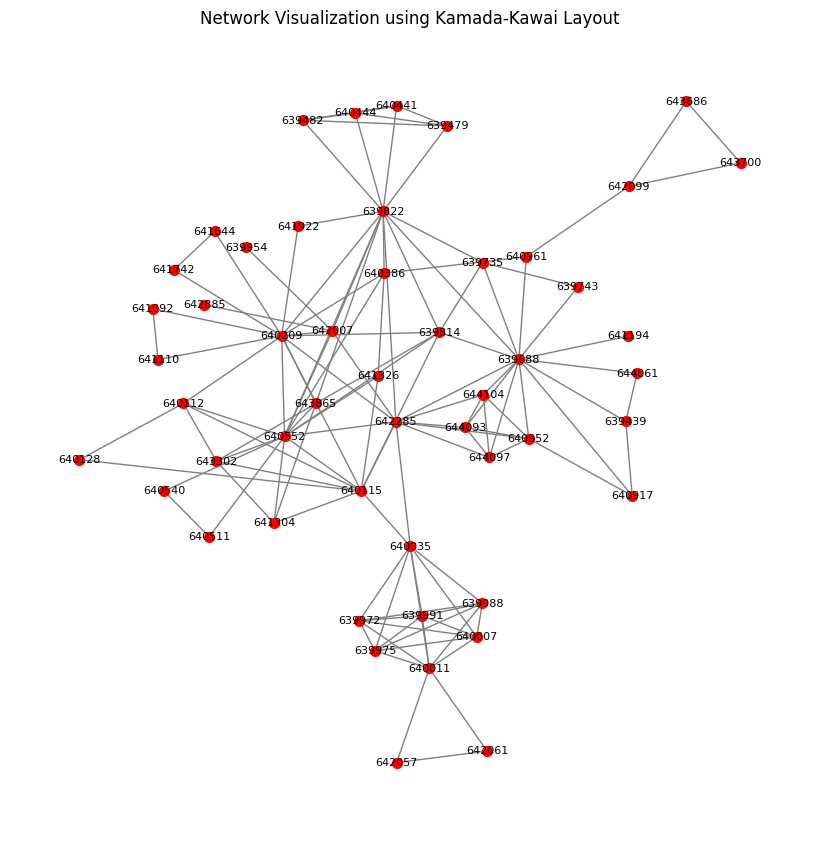

In [ ]:
pos = nx.kamada_kawai_layout(G)  # Get the positions of nodes using Kamada-Kawai layout

plt.figure(figsize=(8, 8))  # Set the size of the plot
nx.draw(G, pos, with_labels=True, node_color='red', edge_color='gray', node_size=50, font_size=8)
plt.title('Network Visualization using Kamada-Kawai Layout')
plt.show()

# **Q6**

In [ ]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

In [ ]:
components = list(nx.connected_components(G))

# Print the number of components and the nodes in each component
print(f"Number of components: {len(components)}")
for i, component in enumerate(components, 1):
    print(f"Component {i}: {component}\nNumber of nodes: {len(component)}\nRelative size: {len(component)/num_nodes}\n")

# Component - The set of nodes that belong to this component.
# Number of nodes -  The number of nodes in this component.
# Relative size - The size of the component divided by the total number of nodes in the graph, giving a measure of how large the component is relative to the entire network. This value provides insight into how spread out or concentrated the connectivity is in the graph.

Number of components: 1
Component 1: {'639482', '639972', '641742', '640209', '643686', '643865', '640961', '639991', '641110', '644097', '640952', '640115', '640007', '642007', '639688', '640035', '640011', '640444', '639735', '639988', '641194', '640112', '639822', '644061', '641092', '641644', '643700', '639479', '643302', '639814', '641922', '641304', '642885', '642285', '639439', '640552', '639743', '639954', '640917', '640441', '644093', '642057', '640511', '639975', '640540', '640128', '640386', '641326', '642099', '644104', '642061'}
Number of nodes: 51
Relative size: 1.0



# **Q7**

<ipython-input-19-4c63c6a29bd9>:22: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min_degree, vmax=max_degree)),


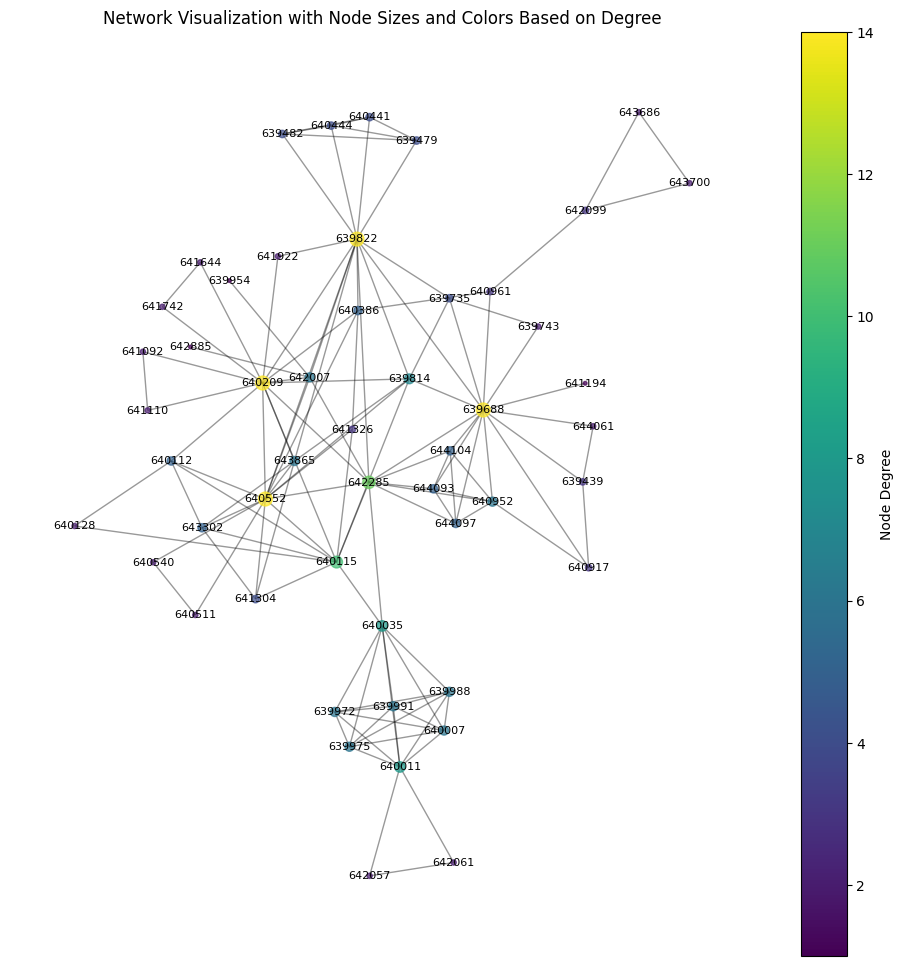

In [ ]:
# Assuming G is your graph
# Calculate the degree of each node (this will dictate the size of the node)
degrees = dict(G.degree())
max_degree = max(degrees.values())
min_degree = min(degrees.values())

# Normalize node size by scaling degrees to be larger in the visualization
node_sizes = [100 * degrees[n] / max_degree for n in G.nodes()]

# Optionally, color nodes based on their degree to provide additional visual information
node_colors = [degrees[n] for n in G.nodes()]

# Draw the network
pos = nx.kamada_kawai_layout(G)  # positions for all nodes using Kamada-Kawai layout

plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis, alpha=0.7)
nx.draw_networkx_edges(G, pos, alpha=0.4)
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')

plt.title('Network Visualization with Node Sizes and Colors Based on Degree')
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min_degree, vmax=max_degree)),
             label='Node Degree')
plt.axis('off')  # Turn off the axis
plt.show()


# **Q8**

In [ ]:
!pip install python-louvain

In [ ]:
import community as community_louvain

<ipython-input-22-fba4a97ac52b>:29: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=max(partition.values()))),


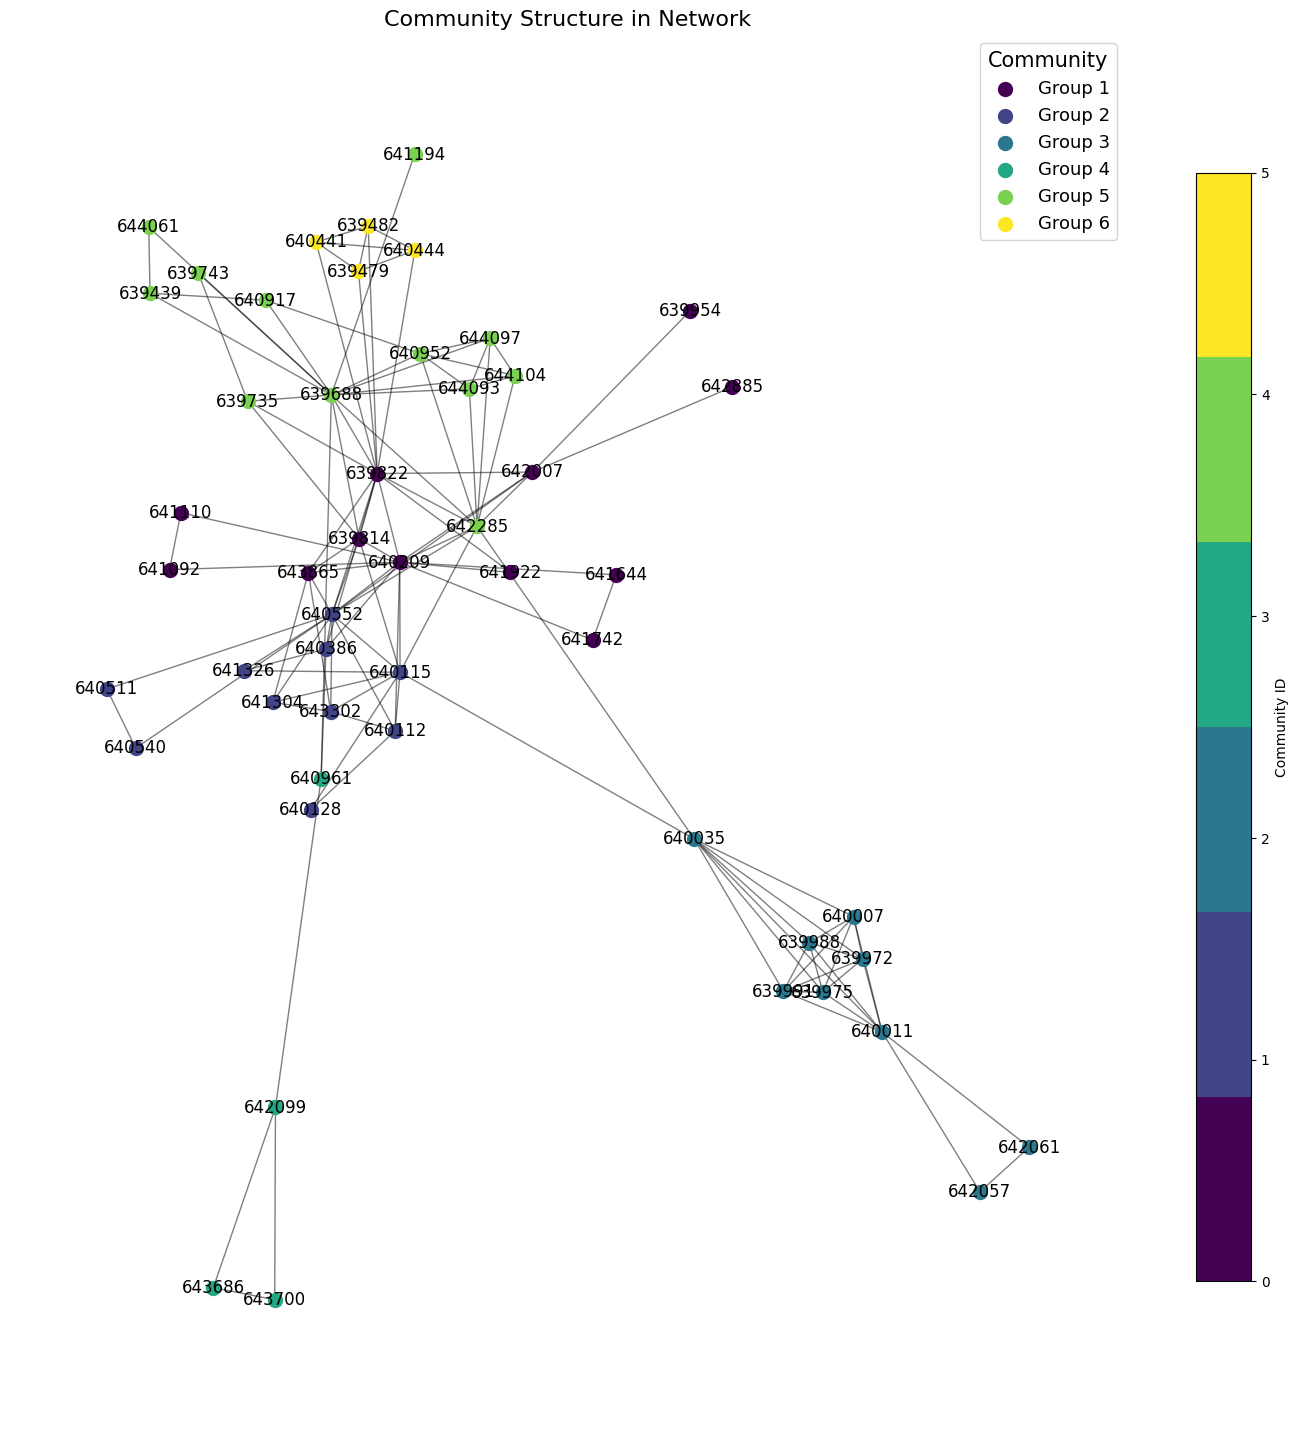

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from community import community_louvain

G = nx.read_gexf(file_name)

# Detect communities using the Louvain method
partition = community_louvain.best_partition(G)

# Visualization setup
pos = nx.spring_layout(G, scale=2)  # Increase the scale for better spread
# Create a color map based on the community ID
cmap = plt.get_cmap('viridis', max(partition.values()) + 1)

# Increase the figure size for better visibility
plt.figure(figsize=(18, 18))  # You can adjust this size based on your specific needs
nx.draw_networkx_edges(G, pos, alpha=0.5)
for comm in set(partition.values()):
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == comm]
    # Increase node size for better visibility
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size=100,  # Increase node size
                           node_color=[cmap(comm)],
                           label=f'Group {comm+1}')  # Group numbering starts at 1 for clarity

# Increase label font size and possibly the font color if required
nx.draw_networkx_labels(G, pos, labels={node: str(node) for node in G.nodes()}, font_size=12, font_color='black')

plt.title('Community Structure in Network', fontsize=16)  # Increase title font size
plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=max(partition.values()))),
             label='Community ID', shrink=0.8)  # Optionally adjust the size of the colorbar
plt.legend(title="Community", title_fontsize='15', fontsize='13', loc='upper right')  # Increase legend and title font sizes
plt.axis('off')  # Turn off the axis
plt.show()

In [ ]:
# Associating nodes to a group:

for community_id in set(partition.values()):
    members = [node for node, comm in partition.items() if comm == community_id]
    print(f"Group {community_id + 1}: {members}")

Group 1: ['639814', '639822', '643865', '639954', '642885', '641644', '641742', '641922', '642007', '641092', '640209', '641110']
Group 2: ['640511', '641304', '643302', '640128', '640112', '640115', '640540', '640552', '640386', '641326']
Group 3: ['640011', '639975', '639991', '640035', '639972', '639988', '642057', '642061', '640007']
Group 4: ['640961', '642099', '643700', '643686']
Group 5: ['644061', '640917', '641194', '639439', '639688', '644104', '644093', '644097', '640952', '639735', '642285', '639743']
Group 6: ['639479', '639482', '640444', '640441']


# **Q9**

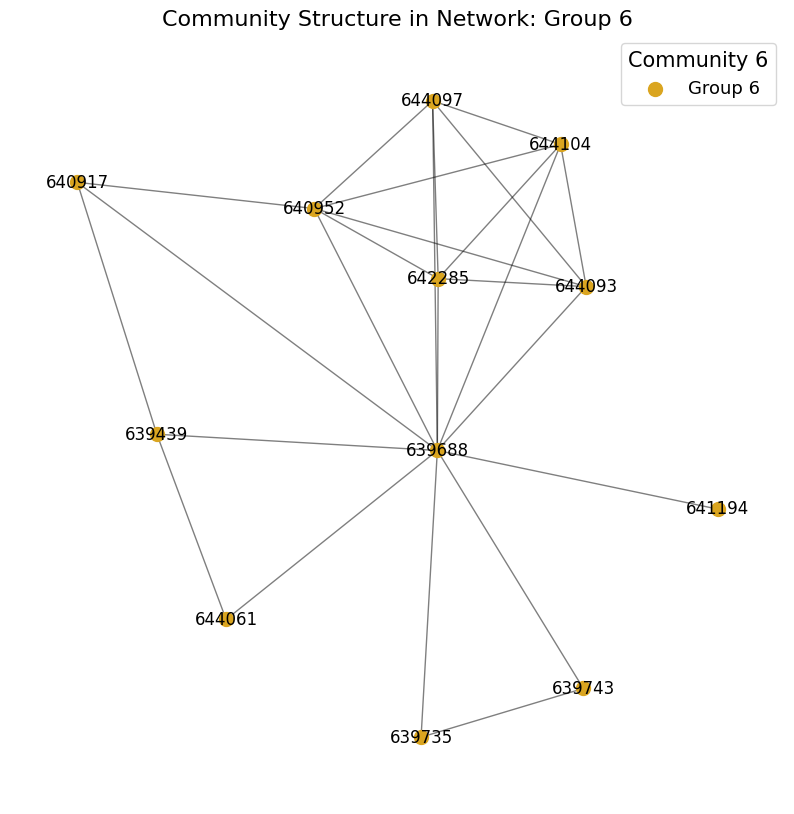

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from community import community_louvain

# Assuming 'file_name' is defined
G = nx.read_gexf('Batman_Returns.gexf')

# Detect communities using the Louvain method
partition = community_louvain.best_partition(G)

# Select nodes of Group 6 (adjust index by -1 because Python uses 0-based index)
group_6_nodes = [node for node, comm in partition.items() if comm == 5]

# Create a subgraph for Group 6
subgraph = G.subgraph(group_6_nodes)

# Visualization using the Kamada-Kawai layout
pos = nx.kamada_kawai_layout(subgraph)

# Plotting the subgraph
plt.figure(figsize=(10, 10))
nx.draw_networkx_edges(subgraph, pos, alpha=0.5)
nx.draw_networkx_nodes(subgraph, pos, node_size=100, node_color='goldenrod', label='Group 6')
nx.draw_networkx_labels(subgraph, pos, font_size=12, font_color='black')
plt.title('Community Structure in Network: Group 6', fontsize=16)
plt.legend(title="Community 6", title_fontsize='15', fontsize='13')
plt.axis('off')
plt.show()


In [ ]:
# Calculate statistics
degree_centrality = nx.degree_centrality(subgraph)
average_degree_centrality = sum(degree_centrality.values()) / len(degree_centrality)
closeness_centrality = nx.closeness_centrality(subgraph)
average_closeness_centrality = sum(closeness_centrality.values()) / len(closeness_centrality)
betweenness_centrality = nx.betweenness_centrality(subgraph)
average_betweenness_centrality = sum(betweenness_centrality.values()) / len(betweenness_centrality)
clustering_coefficient = nx.clustering(subgraph)
average_clustering_coefficient = sum(clustering_coefficient.values()) / len(clustering_coefficient)
number_of_nodes = subgraph.number_of_nodes()
number_of_edges = subgraph.number_of_edges()
network_density = nx.density(subgraph)

# Print statistics
print(f"Number of Nodes: {number_of_nodes}")
print(f"Number of Edges: {number_of_edges}")
print(f"Network Density: {network_density:.4f}")
print(f"Average Degree Centrality: {average_degree_centrality:.4f}")
print(f"Average Closeness Centrality: {average_closeness_centrality:.4f}")
print(f"Average Betweenness Centrality: {average_betweenness_centrality:.4f}")
print(f"Average Clustering Coefficient: {average_clustering_coefficient:.4f}")

Number of Nodes: 12
Number of Edges: 25
Network Density: 0.3788
Average Degree Centrality: 0.3788
Average Closeness Centrality: 0.6340
Average Betweenness Centrality: 0.0621
Average Clustering Coefficient: 0.7768


# **Q10**

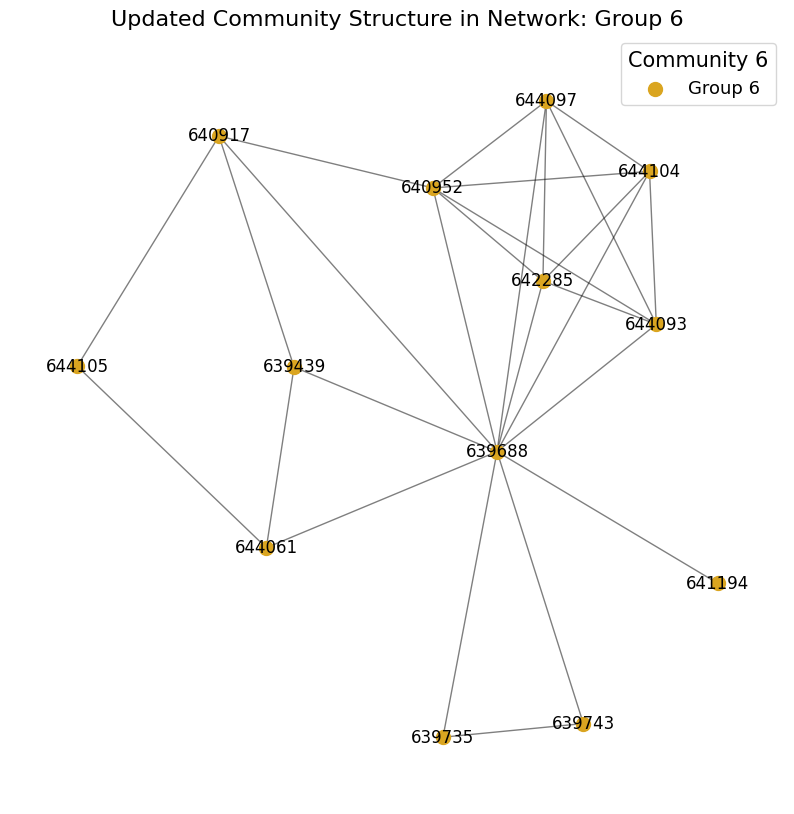

In [ ]:
G = nx.read_gexf('Batman_Returns.gexf')

# Detect communities using the Louvain method
partition = community_louvain.best_partition(G)

# Extract nodes for Group 6
group_6_nodes = [node for node, comm in partition.items() if comm == 5]

# Identify a new node ID that is not already in the graph
# Convert node identifiers to integers, find the max, add 1, and convert back to string
new_node = str(max(map(int, G.nodes())) + 1)

# Choose two existing nodes from Group 6 to connect with the new node
# Selecting the first two nodes from the group list for simplicity
connections = group_6_nodes[:2] if len(group_6_nodes) > 1 else [group_6_nodes[0], group_6_nodes[0]]  # Default to the same node if only one node exists

# Add the new node to the main graph
G.add_node(new_node)

# Add edges from the new node to the chosen existing nodes in Group 6
for node in connections:
    G.add_edge(new_node, node)

# Update the community partition to include the new node in Group 6
partition[new_node] = 5

# Update the subgraph for Group 6 by including the new node
group_6_nodes.append(new_node)
subgraph = G.subgraph(group_6_nodes)

# Visualization using the Kamada-Kawai layout
pos = nx.kamada_kawai_layout(subgraph)

# Plotting the updated subgraph
plt.figure(figsize=(10, 10))
nx.draw_networkx_edges(subgraph, pos, alpha=0.5)
nx.draw_networkx_nodes(subgraph, pos, node_size=100, node_color='goldenrod', label='Group 6')
nx.draw_networkx_labels(subgraph, pos, font_size=12, font_color='black')
plt.title('Updated Community Structure in Network: Group 6', fontsize=16)
plt.legend(title="Community 6", title_fontsize='15', fontsize='13')
plt.axis('off')
plt.show()

In [ ]:
# Recalculate statistics
degree_centrality = nx.degree_centrality(subgraph)
average_degree_centrality = sum(degree_centrality.values()) / len(degree_centrality)
closeness_centrality = nx.closeness_centrality(subgraph)
average_closeness_centrality = sum(closeness_centrality.values()) / len(closeness_centrality)
betweenness_centrality = nx.betweenness_centrality(subgraph)
average_betweenness_centrality = sum(betweenness_centrality.values()) / len(betweenness_centrality)
clustering_coefficient = nx.clustering(subgraph)
average_clustering_coefficient = sum(clustering_coefficient.values()) / len(clustering_coefficient)
number_of_nodes = subgraph.number_of_nodes()
number_of_edges = subgraph.number_of_edges()
network_density = nx.density(subgraph)

# Print updated statistics
print(f"Number of Nodes: {number_of_nodes}")
print(f"Number of Edges: {number_of_edges}")
print(f"Network Density: {network_density:.4f}")
print(f"Average Degree Centrality: {average_degree_centrality:.4f}")
print(f"Average Closeness Centrality: {average_closeness_centrality:.4f}")
print(f"Average Betweenness Centrality: {average_betweenness_centrality:.4f}")
print(f"Average Clustering Coefficient: {average_clustering_coefficient:.4f}")

Number of Nodes: 13
Number of Edges: 27
Network Density: 0.3462
Average Degree Centrality: 0.3462
Average Closeness Centrality: 0.5915
Average Betweenness Centrality: 0.0676
Average Clustering Coefficient: 0.6401


# **Q11**

**""What factors predict the likelihood of nodes belonging to a particular community?"**

In [ ]:
# We will calculate necessary node attributes and prepare data for the logistic regression mode:

import networkx as nx
import pandas as pd
from community import community_louvain
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load your graph
G = nx.read_gexf('Batman_Returns.gexf')

# Detect communities
partition = community_louvain.best_partition(G)
# Convert community data to a pandas DataFrame
node_data = pd.DataFrame({
    'Node': list(partition.keys()),
    'Community': list(partition.values())
})

# Calculate node attributes
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
clustering = nx.clustering(G)

# Add these attributes to the dataframe
node_data['DegreeCentrality'] = node_data['Node'].map(degree_centrality)
node_data['ClosenessCentrality'] = node_data['Node'].map(closeness_centrality)
node_data['Clustering'] = node_data['Node'].map(clustering)

# Select the most common community for binary classification
target_community = node_data['Community'].mode()[0]
node_data['IsTargetCommunity'] = (node_data['Community'] == target_community).astype(int)

# Show the first few rows of the dataframe
print(node_data.head())


     Node  Community  DegreeCentrality  ClosenessCentrality  Clustering  \
0  639814          0              0.14             0.454545    0.523810   
1  640511          4              0.04             0.324675    1.000000   
2  640011          1              0.16             0.308642    0.571429   
3  640961          3              0.06             0.359712    0.000000   
4  641304          4              0.08             0.352113    0.833333   

   IsTargetCommunity  
0                  1  
1                  0  
2                  0  
3                  0  
4                  0  


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       0.00      0.00      0.00         2

    accuracy                           0.88        16
   macro avg       0.44      0.50      0.47        16
weighted avg       0.77      0.88      0.82        16



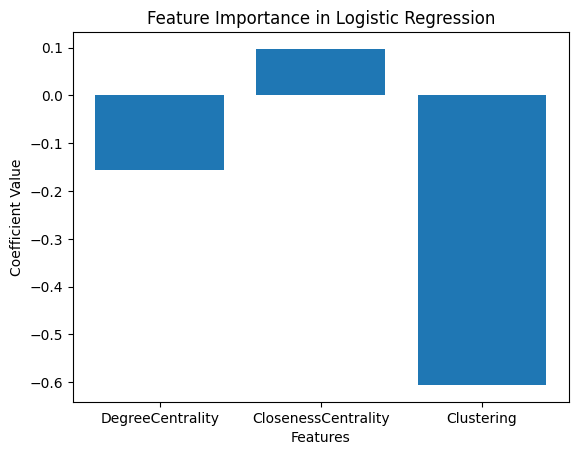

In [ ]:
# Now, set up and train a logistic regression model using the attributes as predictors to see if they can predict membership in the target community:

# Split data into features and target variable
X = node_data[['DegreeCentrality', 'ClosenessCentrality', 'Clustering']]
y = node_data['IsTargetCommunity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

# Visualize coefficients
plt.bar(['DegreeCentrality', 'ClosenessCentrality', 'Clustering'], model.coef_[0])
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()